In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [77]:
bmdata=pd.read_csv('big_mart_sales.csv')

In [78]:
bmdata.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


In [79]:
bmdata.shape

(8523, 12)

In [80]:
bmdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [81]:
bmdata.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [82]:
bmdata['Item_Weight'].fillna(bmdata['Item_Weight'].mean(),inplace=True)

In [83]:
bmdata['Item_Weight'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [84]:
mode_of_Outlet_size=bmdata.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))


In [85]:
print(mode_of_Outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2 Supermarket Type3
Outlet_Size         Small             Small            Medium            Medium


In [86]:
miss_values=bmdata['Outlet_Size'].isnull()

In [87]:
print(miss_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [88]:
bmdata.loc[miss_values,'Outlet_Size']=bmdata.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

In [89]:
bmdata.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [90]:
bmdata.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [91]:
sns.set()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


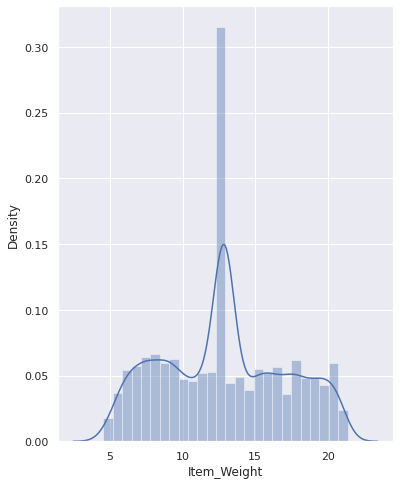

In [92]:
plt.figure(figsize=(6,8))
sns.distplot(bmdata['Item_Weight'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


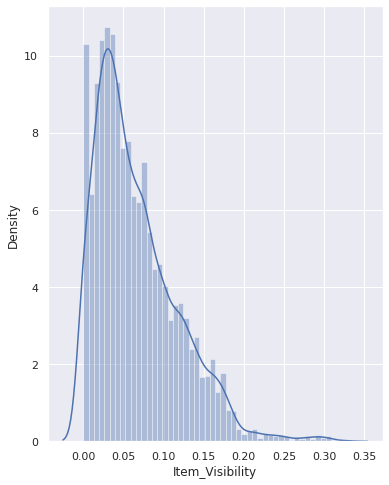

In [93]:
plt.figure(figsize=(6,8))
sns.distplot(bmdata['Item_Visibility'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


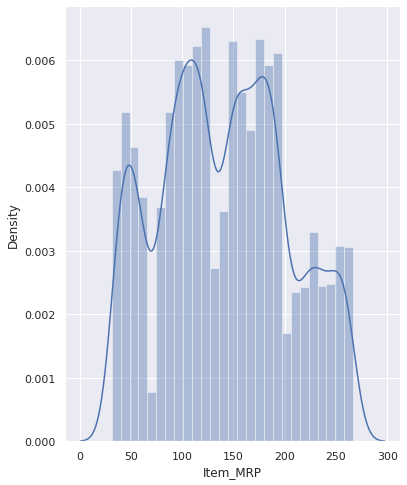

In [94]:
plt.figure(figsize=(6,8))
sns.distplot(bmdata['Item_MRP'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


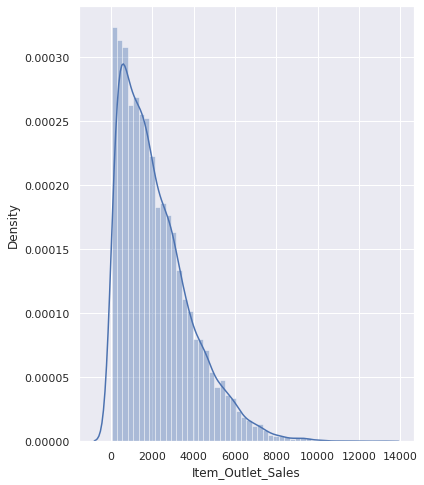

In [95]:
plt.figure(figsize=(6,8))
sns.distplot(bmdata['Item_Outlet_Sales'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


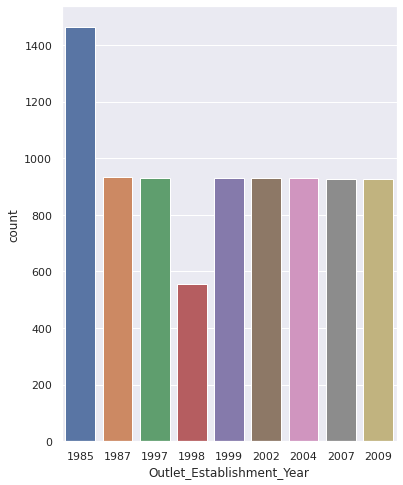

In [96]:
plt.figure(figsize=(6,8))
sns.countplot(bmdata['Outlet_Establishment_Year'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


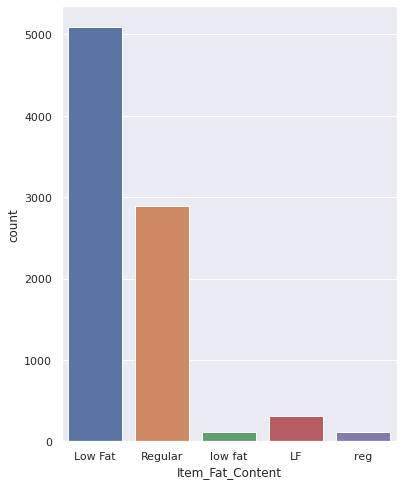

In [97]:
plt.figure(figsize=(6,8))
sns.countplot(bmdata['Item_Fat_Content'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


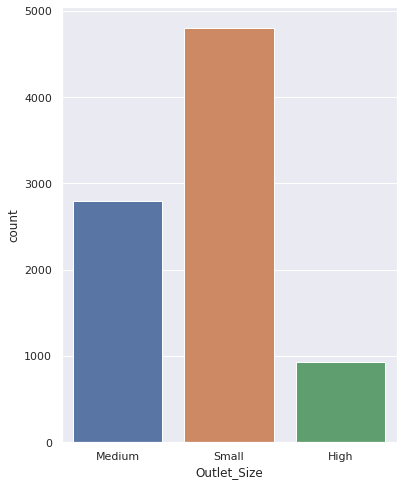

In [98]:
plt.figure(figsize=(6,8))
sns.countplot(bmdata['Outlet_Size'])
plt.show()

In [99]:
bmdata['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [100]:
bmdata.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

In [101]:
bmdata['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [102]:
encoder=LabelEncoder()

In [103]:
bmdata['Item_Identifier']=encoder.fit_transform(bmdata['Item_Identifier'])

In [104]:
bmdata['Item_Fat_Content']=encoder.fit_transform(bmdata['Item_Fat_Content'])

In [105]:
bmdata['Item_Type']=encoder.fit_transform(bmdata['Item_Type'])

In [106]:
bmdata['Oulet_Identifier']=encoder.fit_transform(bmdata['Outlet_Identifier'])

In [107]:
bmdata['Outlet_Size']=encoder.fit_transform(bmdata['Outlet_Size'])

In [108]:
bmdata['Outlet_Location_Type']=encoder.fit_transform(bmdata['Outlet_Location_Type'])

In [109]:
bmdata['Outlet_Type']=encoder.fit_transform(bmdata['Outlet_Type'])

In [110]:
bmdata.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Oulet_Identifier
0,156,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380,9
1,8,5.92,1,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228,3
2,662,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700,9
3,1121,19.20,1,0.000000,6,182.0950,OUT010,1998,2,2,0,732.3800,0
4,1297,8.93,0,0.000000,9,53.8614,OUT013,1987,0,2,1,994.7052,1


In [119]:
bmdata['Oulet_Identifier']=encoder.fit_transform(bmdata['Outlet_Identifier'])

In [123]:
X=bmdata.drop(['Item_Outlet_Sales','Outlet_Identifier'],axis=1)

In [124]:
Y=bmdata['Item_Outlet_Sales']

In [125]:
X

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Oulet_Identifier
0,156,9.300,0,0.016047,4,249.8092,1999,1,0,1,9
1,8,5.920,1,0.019278,14,48.2692,2009,1,2,2,3
2,662,17.500,0,0.016760,10,141.6180,1999,1,0,1,9
3,1121,19.200,1,0.000000,6,182.0950,1998,2,2,0,0
4,1297,8.930,0,0.000000,9,53.8614,1987,0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1987,0,2,1,1
8519,897,8.380,1,0.046982,0,108.1570,2002,2,1,1,7
8520,1357,10.600,0,0.035186,8,85.1224,2004,2,1,1,6
8521,681,7.210,1,0.145221,13,103.1332,2009,1,2,2,3


In [126]:
Y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [127]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [128]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((6818, 11), (1705, 11), (6818,), (1705,))

In [129]:
model=XGBRegressor()

In [130]:
model.fit(X_train,Y_train)

[05:46:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [138]:
train_data_predict=model.predict(X_train)

In [139]:
r2_train=metrics.r2_score(Y_train,train_data_predict)

In [134]:
r2_train

0.6364457030941357

In [140]:
test_data_predict=model.predict(X_test)
r2_test=metrics.r2_score(Y_test,test_data_predict)

In [141]:
r2_test

0.5867640914432671